# Enhanced knnFeat 
this could extract feature for test data that class is unknown

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#toydata-plot" data-toc-modified-id="toydata-plot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>toydata plot</a></span></li><li><span><a href="#Original-knnFeat" data-toc-modified-id="Original-knnFeat-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Original knnFeat</a></span><ul class="toc-item"><li><span><a href="#visualized-feature-extraction" data-toc-modified-id="visualized-feature-extraction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>visualized feature extraction</a></span></li></ul></li><li><span><a href="#Enhanced-knnFeat" data-toc-modified-id="Enhanced-knnFeat-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Enhanced knnFeat</a></span><ul class="toc-item"><li><span><a href="#create-test-data" data-toc-modified-id="create-test-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>create test data</a></span></li><li><span><a href="#function-source-code" data-toc-modified-id="function-source-code-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>function source code</a></span></li><li><span><a href="#visualized-feature-extraciton-(for-test-data)" data-toc-modified-id="visualized-feature-extraciton-(for-test-data)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>visualized feature extraciton (for test data)</a></span></li></ul></li><li><span><a href="#using-Iris-dataset" data-toc-modified-id="using-Iris-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>using Iris dataset</a></span><ul class="toc-item"><li><span><a href="#Iris-data-plot" data-toc-modified-id="Iris-data-plot-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Iris data plot</a></span></li><li><span><a href="#original-knnFeat" data-toc-modified-id="original-knnFeat-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>original knnFeat</a></span></li><li><span><a href="#Enhanced-knnFeat" data-toc-modified-id="Enhanced-knnFeat-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Enhanced knnFeat</a></span></li></ul></li></ul></div>

## toydata plot

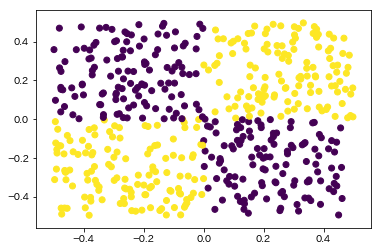

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x0 = np.random.rand(500) - 0.5
x1 = np.random.rand(500) - 0.5
X = np.array(list(zip(x0, x1)))
y = np.array([1 if i0 * i1 > 0 else 0 for (i0, i1)  in list(zip(x0, x1))])

plt.scatter(X[:,0], X[:,1], c=y)

## Original knnFeat
source : https://github.com/upura/knnFeat  

In [2]:
import numpy as np
from sklearn.model_selection import KFold

def _distance(a, b):
    return np.linalg.norm(b - a)

def _get_feat(data, X_train, y_train, class_index, k_index):
    inclass_X = X_train[y_train == class_index]
    distances = np.array([_distance(a, data) for a in inclass_X])
    sorted_distances_index = np.argsort(distances)
    nearest_index = list(sorted_distances_index[0: (k_index + 1)])
    dist = np.sum(distances[nearest_index])
    return dist

def knnExtract(X, y, k = 1, holds = 5):
    CLASS_NUM = len(set(y))
    res = np.empty((len(X), CLASS_NUM * k))
    kf = KFold(n_splits = holds,  shuffle = True)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        features = np.empty([0, len(X_test)])
        
        for class_index in range(CLASS_NUM):
            for k_index in range(k):
                feat = np.array([np.apply_along_axis(_get_feat, 1, X_test, X_train, y_train, class_index, k_index)])
                features = np.append(features, feat, axis = 0)
        res[test_index] = features.T      

    return res

### visualized feature extraction

In [3]:
newX = knnExtract(X, y, k=1, holds = 5)

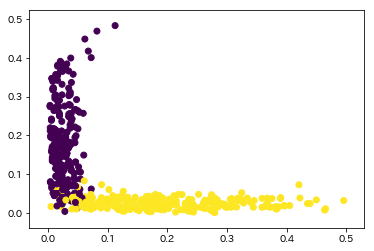

In [4]:
plt.scatter(newX[:,0], newX[:,1], c=y)

## Enhanced knnFeat

### create test data

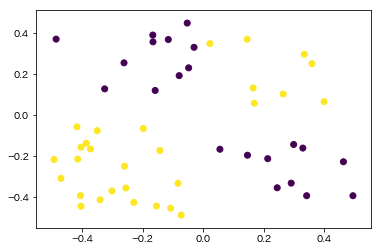

In [5]:
x0 = np.random.rand(50) - 0.5
x1 = np.random.rand(50) - 0.5
X_test = np.array(list(zip(x0, x1)))
y_test = np.array([1 if i0 * i1 > 0 else 0 for (i0, i1)  in list(zip(x0, x1))])
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

### function source code

In [6]:
def enhanced_knnExtract(X, X_train, y_train, k = 1, holds = 5):
    CLASS_NUM = len(set(y_train))
    res = np.empty((len(X), CLASS_NUM * k))
    kf = KFold(n_splits = holds,  shuffle = True)
        
    for (train_index_trash, test_index), (train_index, test_index_trash)  in zip(kf.split(X), kf.split(X_train)):
        X_trainNN = X_train[train_index]
        y_trainNN = y_train[train_index]
        X_testNN = X[test_index]
        features = np.empty([0, len(X_testNN)])
       
        
        for class_index in range(CLASS_NUM):
            for k_index in range(k):
                feat = np.array([np.apply_along_axis(_get_feat, 1, X_testNN, X_trainNN, y_trainNN, class_index, k_index)])
                features = np.append(features, feat, axis = 0)
        res[test_index] = features.T            

    return res

### visualized feature extraciton (for test data)

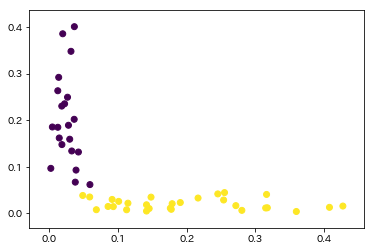

In [7]:
newX = enhanced_knnExtract(X_test, X, y, k=1, holds = 5)
plt.scatter(newX[:,0], newX[:,1], c=y_test)

## using Iris dataset

### Iris data plot

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
y = iris.target
X = iris.data
X_train, X_test, y_train, y_test = train_test_split(X, y)

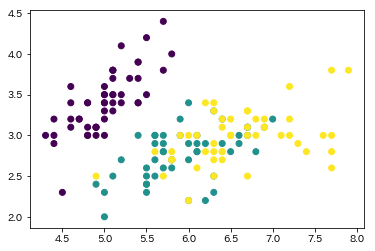

In [9]:
plt.scatter(X[:,0], X[:,1], c=y)

### original knnFeat
visualize feature extraction for all data

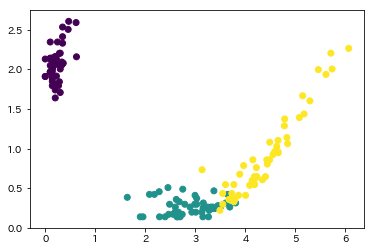

In [10]:
newX = knnExtract(X, y, k=1, holds = 5)
plt.scatter(newX[:,0], newX[:,1], c=y)

### Enhanced knnFeat
visualize feature extraction for test data (does not obtained class infomations)

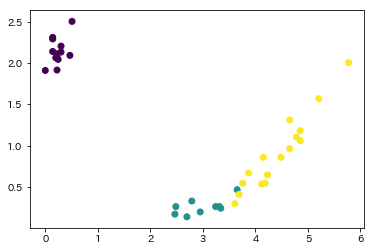

In [11]:
newX = enhanced_knnExtract(X_test, X_train, y_train, k=1, holds = 5)
plt.scatter(newX[:,0], newX[:,1], c=y_test)